<a href="https://colab.research.google.com/github/jisusP/Articulo/blob/main/Randic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install rdkit-pypi
!pip install  mordred
!pip install mathchem

In [2]:
from rdkit.Chem import AllChem
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors
import pandas as pd
import numpy as np
from mordred import Calculator, descriptors

url="https://raw.githubusercontent.com/jisusP/Articulo/main/SMILES.csv"
dataset = pd.read_csv(url)
dataset['#']=dataset['#']+5
dataset

,#,smiles
0,6,CCC1=CC=C2N=C(C=CC2=C1)C1=NC=CC=C1
1,7,ClC1=CC=C2N=C(C=CC2=C1)C1=CN=CC=C1
2,8,FC1=CC=C2N=C(C=CC2=C1)C1=CN=CC=C1
3,9,C1=CC=C2N=C(C=CC2=C1)C1=CC=NC=C1
4,10,CC1=CC=C2N=C(C=CC2=C1)C1=CC=NC=C1
5,11,ClC1=CC=C2N=C(C=CC2=C1)C1=CC=NC=C1
6,12,ClC1=C2N=C(C=CC2=CC=C1)C1=CC=NC=C1
7,13,FC1=CC=C2N=C(\C=C\C3=NC=CC=C3)C=CC2=C1
8,14,C(=C/C1=NC2=CC=CC=C2C=C1)\C1=CN=CC=C1
9,15,ClC1=CC=C2N=C(\C=C\C3=CN=CC=C3)C=CC2=C1


ínidice de Randic (Dependiendo del enlace)

In [3]:
def randic_index(smiles):
  mol = Chem.MolFromSmiles(smiles)
  if mol is None:
    return None
  atomic_numbers = [atom.GetAtomicNum() for atom in mol.GetAtoms()]

    # Construir la matriz de Barysz ponderada por el número atómico
  barysz_matrix = np.zeros((len(atomic_numbers), len(atomic_numbers)))

  for bond in mol.GetBonds():
      i = bond.GetBeginAtomIdx()
      j = bond.GetEndAtomIdx()

      # Ponderar el elemento de la matriz por el número atómico promedio
      weight = (atomic_numbers[i] + atomic_numbers[j]) / 2.0
      barysz_matrix[i, j] = weight
      barysz_matrix[j, i] = weight
  #M_adyacencia = Chem.GetAdjacencyMatrix(mol)

  N_atoms = mol.GetNumAtoms()
  Grado_conectividad = np.sum(barysz_matrix, axis=1)
  randic = 0
  for i in range(N_atoms):
    for j in range(i+1, N_atoms):
      if barysz_matrix[i, j] != 0:
        randic += 1 /(Grado_conectividad[i] * Grado_conectividad[j])**0.5
  return randic#, Grado_conectividad

####################################################################################
# 2da Función para calcular el índice de Randic
def randic_index_2(mol):

    atom_degrees = [atom.GetDegree() for atom in mol.GetAtoms()]


    randic_index = 0
    for bond in mol.GetBonds():
        begin_atom = bond.GetBeginAtomIdx()
        end_atom = bond.GetEndAtomIdx()
        """
        bond_length = bond.GetBondTypeAsDouble()

        GetBondTypeAsDouble()
        Enlace simple = 1
        Doble = 2
        Triple = 3
        Aromático = 1.5
        """
        # Ponderar el elemento de la matriz por el número atómico promedio


        randic_index += 1 / (atom_degrees[begin_atom] * atom_degrees[end_atom]) ** 0.5 #* bond_length

    return randic_index



Randic = []
for smi in dataset['smiles']:
  Randic.append(randic_index(smi))

dataset['Randic']=Randic
"""
smiles = 'CC(=C)C'
mol = Chem.MolFromSmiles(smiles)

# Calcular el índice de Randic
randic_index = calculate_randic_index(mol)

# Imprimir el resultado
print("El índice de Randic de la molécula es:", randic_index)
"""
dataset

,#,smiles,Randic
0,6,CCC1=CC=C2N=C(C=CC2=C1)C1=NC=CC=C1,1.455136
1,7,ClC1=CC=C2N=C(C=CC2=C1)C1=CN=CC=C1,1.312057
2,8,FC1=CC=C2N=C(C=CC2=C1)C1=CN=CC=C1,1.345563
3,9,C1=CC=C2N=C(C=CC2=C1)C1=CC=NC=C1,1.298487
4,10,CC1=CC=C2N=C(C=CC2=C1)C1=CC=NC=C1,1.364128
5,11,ClC1=CC=C2N=C(C=CC2=C1)C1=CC=NC=C1,1.311748
6,12,ClC1=C2N=C(C=CC2=CC=C1)C1=CC=NC=C1,1.316377
7,13,FC1=CC=C2N=C(\C=C\C3=NC=CC=C3)C=CC2=C1,1.510105
8,14,C(=C/C1=NC2=CC=CC=C2C=C1)\C1=CN=CC=C1,1.462486
9,15,ClC1=CC=C2N=C(\C=C\C3=CN=CC=C3)C=CC2=C1,1.475748


Cándida Albicans

<ipython-input-5-81b5c4560071>:16: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  d = shc.dendrogram(shc.linkage(distance_matrix, method = "ward"), labels = lab)


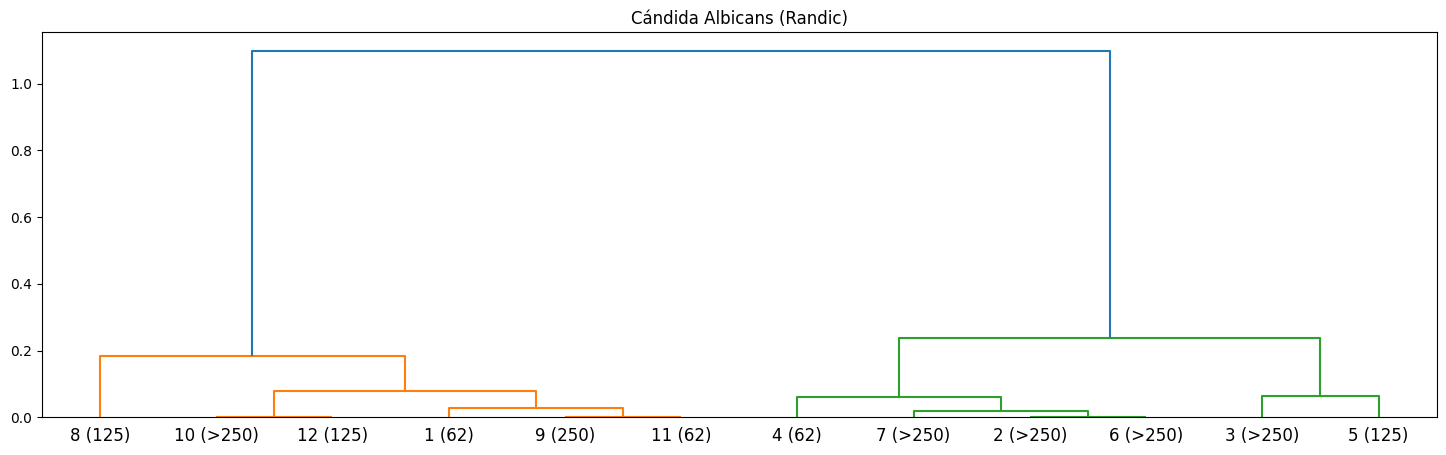

In [5]:
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt
import numpy as np

randic_indices = dataset['Randic']  # List of Randic index values

def randic_similarity(ri1, ri2):
    return 1 - abs(ri1 - ri2)

similarity_matrix = [[randic_similarity(ri1, ri2) for ri2 in randic_indices] for ri1 in randic_indices]
distance_matrix = [[1 - randic_similarity(ri1, ri2) for ri2 in randic_indices] for ri1 in randic_indices]

lab = ["1 (62)","2 (>250)","3 (>250)","4 (62)","5 (125)","6 (>250)","7 (>250)","8 (125)","9 (250)","10 (>250)","11 (62)","12 (125)"]
plt.figure(figsize=(18,5))
plt.title("Cándida Albicans (Randic)")
d = shc.dendrogram(shc.linkage(distance_matrix, method = "ward"), labels = lab)

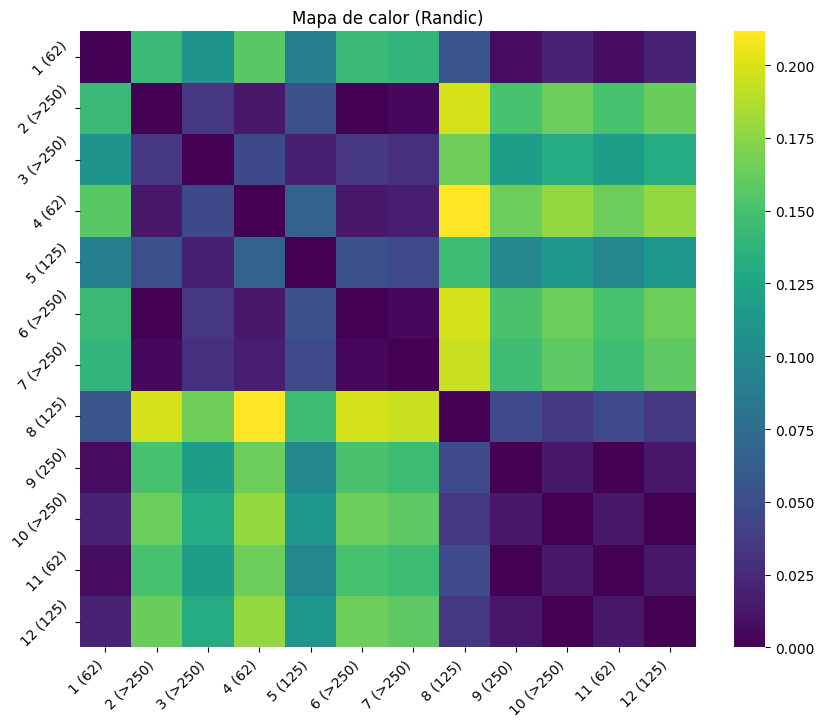

In [6]:
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(distance_matrix, annot=False, cbar=True, square=True, cmap='viridis')
plt.xticks(np.arange(len(lab)) + 0.5, lab, rotation=45, ha='right')
plt.yticks(np.arange(len(lab)) + 0.5, lab, rotation=45, ha='right')
# Configurar el aspecto del heatmap
plt.title("Mapa de calor (Randic)")
plt.xlabel
plt.ylabel

# Mostrar el heatmap
plt.show()

***Conectividad a través de grafos***

In [ ]:
from rdkit import Chem
import networkx as nx
import graphviz

def construir_grafo(smiles):
    mol = Chem.MolFromSmiles(smiles)
    grafo = nx.Graph()

    for atom in mol.GetAtoms():
        grafo.add_node(atom.GetIdx(), etiqueta=atom.GetSymbol())

    for bond in mol.GetBonds():
        grafo.add_edge(bond.GetBeginAtomIdx(), bond.GetEndAtomIdx())

    return grafo
randic=0
def obtener_grado_conectividad(grafo):
    for nodo in grafo.nodes:
        etiqueta = grafo.nodes[nodo]['etiqueta']
        grado = grafo.degree[nodo]
        print(f"Grado de conectividad de {etiqueta}: {grado}")


# Ejemplo de uso
smiles = "CC(COC)CC(=C)C"
grafo = construir_grafo(smiles)
obtener_grado_conectividad(grafo)


Grado de conectividad de C: 1
Grado de conectividad de C: 3
Grado de conectividad de C: 2
Grado de conectividad de O: 2
Grado de conectividad de C: 1
Grado de conectividad de C: 2
Grado de conectividad de C: 3
Grado de conectividad de C: 1
Grado de conectividad de C: 1
